In [2]:
sessionInfo()

R version 4.1.2 (2021-11-01)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /home/sherli001/.conda/envs/singlecell/lib/libopenblasp-r0.3.18.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] hgu219.db_3.2.3       org.Hs.eg.db_3.14.0   forcats_0.5.2        
 [4] stringr_1.5.0         dplyr_1.1.0           purrr_1.0.1          
 [7] readr_2.1.3           tidyr_1.3.0           tibble_3.1.7         
[10] ggplot2_3.3.6         tidyverse_1.3.2       AnnotationDbi_1.56.2 


In [1]:
library(WGCNA)
library(AnnotationDbi)
library(tidyverse)
library(ggplot2)
options(stringsAsFactors = FALSE)

library(hgu219.db)

Loading required package: dynamicTreeCut

Loading required package: fastcluster


Attaching package: ‘fastcluster’


The following object is masked from ‘package:stats’:

    hclust





Attaching package: ‘WGCNA’


The following object is masked from ‘package:stats’:

    cor


Warning message:
“package ‘AnnotationDbi’ was built under R version 4.1.3”
Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


In [3]:
load(file = "pairwise_RData_files/20230419_pairwise_WGCNA_ADNI_allSubjects_gender_rin_phase_corrected-01-dataInput.RData")
load(file = "pairwise_RData_files/20230419_MCI_AD_gender_rin_phase_corrected-02-networkConstruction-stepByStep.RData")
load(file = "pairwise_RData_files/20230419_datExpr_MCI_AD_gender_rin_phase_corrected_selectHVGs.RData")

In [4]:
ls()

[1] "datExpr_CN_AD_gender_rin_phase_corrected"   
 [2] "datExpr_CN_MCI_gender_rin_phase_corrected"  
 [3] "datExpr_MCI_AD_gender_rin_phase_corrected"  
 [4] "datExpr_MCI_AD_selectHVGs"                  
 [5] "datTraits_CN_AD_gender_rin_phase_corrected" 
 [6] "datTraits_CN_MCI_gender_rin_phase_corrected"
 [7] "datTraits_MCI_AD_gender_rin_phase_corrected"
 [8] "geneTree_MCI_AD_gender_rin_phase"           
 [9] "MEs_MCI_AD_gender_rin_phase"                
[10] "moduleColors_MCI_AD_gender_rin_phase"       
[11] "moduleLabels_MCI_AD_gender_rin_phase"

## Quantifying module-trait associations

In [5]:
# Define numbers of genes and samples
nGenes_MCI_AD <- ncol(datExpr_MCI_AD_selectHVGs)
nSamples_MCI_AD <- nrow(datExpr_MCI_AD_selectHVGs)

# Recalculate MEs with color labels
MEs0_MCI_AD = moduleEigengenes(datExpr_MCI_AD_selectHVGs, moduleColors_MCI_AD_gender_rin_phase)$eigengenes
MEs_MCI_AD = orderMEs(MEs0_MCI_AD)
moduleTraitCor_MCI_AD = cor(MEs_MCI_AD, datTraits_MCI_AD_gender_rin_phase_corrected, use = "p");
moduleTraitPvalue_MCI_AD = corPvalueStudent(moduleTraitCor_MCI_AD, nSamples_MCI_AD);

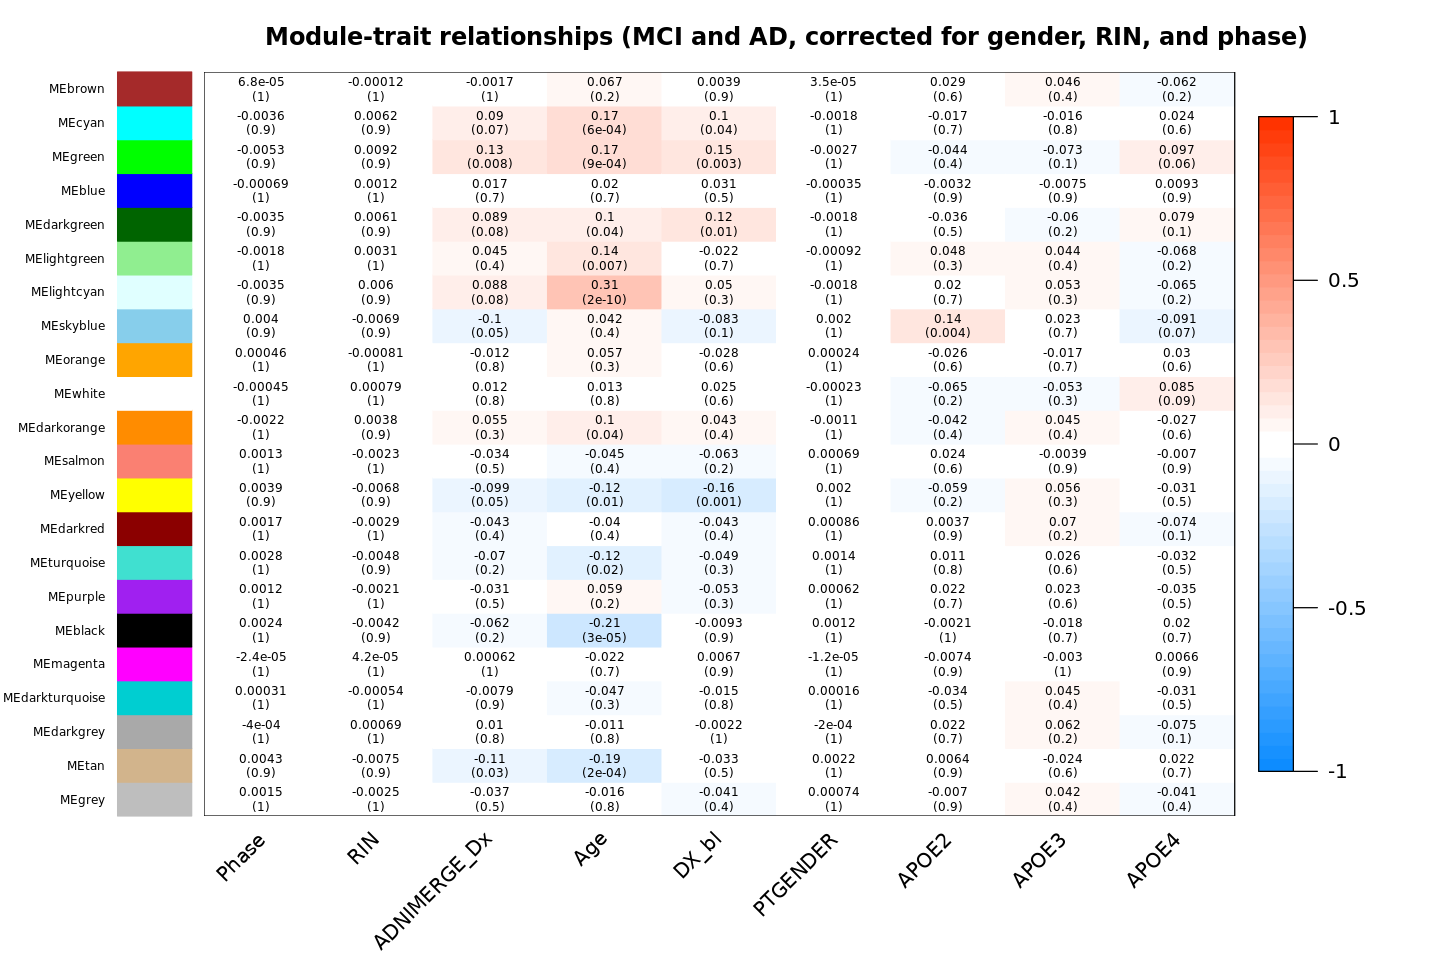

In [6]:
# sizeGrWindow(12,9)
options(repr.plot.width = 12, repr.plot.height = 8)
# Will display correlations and their p-values
textMatrix_MCI_AD = paste(signif(moduleTraitCor_MCI_AD, 2), "\n(",
                                        signif(moduleTraitPvalue_MCI_AD, 1), ")", sep = "");
dim(textMatrix_MCI_AD) = dim(moduleTraitCor_MCI_AD)
par(mar = c(6, 8.5, 3, 3));
# Display the correlation values within a heatmap plot
labeledHeatmap(Matrix = moduleTraitCor_MCI_AD,
               xLabels = names(datTraits_MCI_AD_gender_rin_phase_corrected),
               yLabels = names(MEs_MCI_AD),
               ySymbols = names(MEs_MCI_AD),
               colorLabels = FALSE,
               colors = blueWhiteRed(50),
               textMatrix = textMatrix_MCI_AD,
               setStdMargins = FALSE,
               cex.text = 0.6,
               cex.lab.y = 0.6,
               zlim = c(-1,1),
               main = paste("Module-trait relationships (MCI and AD, corrected for gender, RIN, and phase)"))

In [7]:
pdf(file = "pairwise_plots/MCI_AD_moduleTraitCor.pdf", 
    width = 12, height = 9)

textMatrix_MCI_AD = paste(signif(moduleTraitCor_MCI_AD, 2), "\n(",
                                        signif(moduleTraitPvalue_MCI_AD, 1), ")", sep = "");
dim(textMatrix_MCI_AD) = dim(moduleTraitCor_MCI_AD)
par(mar = c(6, 8.5, 3, 3));
# Display the correlation values within a heatmap plot
labeledHeatmap(Matrix = moduleTraitCor_MCI_AD,
               xLabels = names(datTraits_MCI_AD_gender_rin_phase_corrected),
               yLabels = names(MEs_MCI_AD),
               ySymbols = names(MEs_MCI_AD),
               colorLabels = FALSE,
               colors = blueWhiteRed(50),
               textMatrix = textMatrix_MCI_AD,
               setStdMargins = FALSE,
               cex.text = 0.6,
               cex.lab.y = 0.6,
               zlim = c(-1,1),
               main = paste("Module-trait relationships (MCI and AD, corrected for gender, RIN, and phase)"))

dev.off()

png 
  2

## Gene relationship to trait and important modules

In [8]:
# Define variable diagnosis containing diagnosis column of datTrait
diagnosis  <- as.data.frame(datTraits_MCI_AD_gender_rin_phase_corrected$ADNIMERGE_Dx)
names(diagnosis) <- "diagnosis"

In [9]:
# names (colors) of the modules
modNames_MCI_AD = substring(names(MEs_MCI_AD), 3)
modNames_MCI_AD

[1] "brown"         "cyan"          "green"         "blue"         
 [5] "darkgreen"     "lightgreen"    "lightcyan"     "skyblue"      
 [9] "orange"        "white"         "darkorange"    "salmon"       
[13] "yellow"        "darkred"       "turquoise"     "purple"       
[17] "black"         "magenta"       "darkturquoise" "darkgrey"     
[21] "tan"           "grey"

In [10]:
geneModuleMembership_MCI_AD <- as.data.frame(cor(datExpr_MCI_AD_selectHVGs, 
                                                MEs_MCI_AD, use = "p"))
MMPvalue_MCI_AD <- as.data.frame(corPvalueStudent(as.matrix(geneModuleMembership_MCI_AD), 
                                                 nSamples_MCI_AD))

names(geneModuleMembership_MCI_AD) = paste("MM", modNames_MCI_AD, sep="");
names(MMPvalue_MCI_AD) = paste("p.MM", modNames_MCI_AD, sep="");

In [11]:
geneTraitSignificance_MCI_AD.diagnosis = as.data.frame(cor(datExpr_MCI_AD_selectHVGs, diagnosis, use = "p"));

GSPvalue_MCI_AD.diagnosis = as.data.frame(
    corPvalueStudent(as.matrix(geneTraitSignificance_MCI_AD.diagnosis), nSamples_MCI_AD));

names(geneTraitSignificance_MCI_AD.diagnosis) = paste("GS.", names(diagnosis), sep="");
names(GSPvalue_MCI_AD.diagnosis) = paste("p.GS.", names(diagnosis), sep="");

In [12]:
# convert probe names to gene symbols
vector_datExpr_MCI_AD_geneSymbols <- rep(0, length = ncol(datExpr_MCI_AD_selectHVGs))

vector_datExpr_MCI_AD_geneSymbols <- AnnotationDbi::mapIds(hgu219.db,
                                                          keys = datExpr_MCI_AD_selectHVGs %>% colnames,
                                                          column = "SYMBOL",
                                                          keytype = "PROBEID",
                                                          multiVals = "first")

'select()' returned 1:many mapping between keys and columns



In [13]:
df_datExpr_MCI_AD_geneSymbols <- data.frame(vector_datExpr_MCI_AD_geneSymbols)
colnames(df_datExpr_MCI_AD_geneSymbols) <- c("geneSymbol")

df_datExpr_MCI_AD_geneSymbols %>% head

,geneSymbol
,<chr>
11756083_x_at,HLA-DQA1
11732801_at,SIRPB1
11755998_x_at,HLA-DRB4
11760799_x_at,HLA-DPB1
11732800_a_at,SIRPB1
11752660_a_at,SIRPB1


In [14]:
# Create the starting data frame
geneInfo0_MCI_AD_diagnosis = data.frame(geneProbe = rownames(df_datExpr_MCI_AD_geneSymbols),
                                       geneSymbol = df_datExpr_MCI_AD_geneSymbols$geneSymbol,
                                       moduleColor = moduleColors_MCI_AD_gender_rin_phase,
                                       geneTraitSignificance_MCI_AD.diagnosis,
                                       GSPvalue_MCI_AD.diagnosis)

# Order modules by their significance for weight
modOrder_MCI_AD_diagnosis = order(-abs(cor(MEs_MCI_AD, diagnosis, use = "p")));
# Add module membership information in the chosen order
for (mod in 1:ncol(geneModuleMembership_MCI_AD))
{
    oldNames_diagnosis = names(geneInfo0_MCI_AD_diagnosis)
    geneInfo0_MCI_AD_diagnosis = data.frame(geneInfo0_MCI_AD_diagnosis, geneModuleMembership_MCI_AD[, modOrder_MCI_AD_diagnosis[mod]],
                                     MMPvalue_MCI_AD[, modOrder_MCI_AD_diagnosis[mod]]);
    names(geneInfo0_MCI_AD_diagnosis) = c(oldNames_diagnosis, paste("MM.", modNames_MCI_AD[modOrder_MCI_AD_diagnosis[mod]], sep=""),
                                   paste("p.MM.", modNames_MCI_AD[modOrder_MCI_AD_diagnosis[mod]], sep=""))
}
# Order the genes in the geneInfo variable first by module color, then by geneTraitSignificance
geneOrder_MCI_AD_diagnosis = order(geneInfo0_MCI_AD_diagnosis$moduleColor, -abs(geneInfo0_MCI_AD_diagnosis$GS.diagnosis));
geneInfo_MCI_AD_diagnosis = geneInfo0_MCI_AD_diagnosis[geneOrder_MCI_AD_diagnosis, ]

In [15]:
geneInfo_MCI_AD_diagnosis %>% head

,geneProbe,geneSymbol,moduleColor,GS.diagnosis,p.GS.diagnosis,MM.green,p.MM.green,MM.tan,p.MM.tan,MM.skyblue,⋯,MM.white,p.MM.white,MM.darkgrey,p.MM.darkgrey,MM.darkturquoise,p.MM.darkturquoise,MM.brown,p.MM.brown,MM.magenta,p.MM.magenta
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
11730321_a_at,11730321_a_at,CLEC2D,black,-0.1510502,0.002647089,-0.5837871,2.307172e-37,0.40113073,1.156267e-16,-0.15000037,⋯,-0.19776853,7.742802e-05,1.926793e-01,1.188215e-04,0.056010613,0.2673795,0.06406857,2.044452e-01,0.27726043,2.192740e-08
11716161_s_at,11716161_s_at,LBH,black,-0.1473565,0.003371450,-0.5509553,1.168510e-32,0.41634783,5.969887e-18,-0.16351802,⋯,-0.20247738,5.159095e-05,2.175678e-01,1.317488e-05,0.049258227,0.3294445,0.45571604,1.339829e-21,-0.03088444,5.410429e-01
11722155_a_at,11722155_a_at,SGMS2,black,0.1329413,0.008237866,0.1121250,2.604303e-02,-0.18176152,2.871176e-04,0.09400570,⋯,0.13301590,8.201532e-03,-1.566951e-01,1.810234e-03,-0.060543360,0.2305150,-0.08799136,8.108688e-02,-0.22954649,4.154395e-06
11757115_s_at,11757115_s_at,HSPA8,black,-0.1316404,0.008894585,-0.1331922,8.116282e-03,0.09176748,6.882207e-02,-0.02450845,⋯,0.03588888,4.774937e-01,8.990947e-05,9.985806e-01,-0.021411654,0.6717792,-0.15488878,2.047091e-03,0.25722310,2.256355e-07
11733194_s_at,11733194_s_at,FMNL3,black,-0.1312944,0.009076959,-0.2712144,4.520929e-08,0.25134693,4.312609e-07,0.09314185,⋯,-0.03728889,4.604729e-01,4.453371e-02,3.779943e-01,0.042897157,0.3957868,0.09978306,4.778376e-02,0.31334699,2.005831e-10
11743425_x_at,11743425_x_at,NSG1,black,-0.1291036,0.010310590,-0.1760316,4.473043e-04,0.04977409,3.243985e-01,-0.01607107,⋯,-0.11116772,2.735262e-02,-4.283465e-03,9.324565e-01,0.002772823,0.9562467,0.10215864,4.269786e-02,0.11658359,2.063133e-02


In [16]:
write.csv(geneInfo_MCI_AD_diagnosis, file = "pairwise_csv_files/20230419_geneInfo_MCI_AD_gender_rin_phase_corrected.csv")

In [17]:
entrezCodes_MCI_AD <- AnnotationDbi::mapIds(hgu219.db,
                                           keys = datExpr_MCI_AD_selectHVGs %>% colnames,
                                           column = "ENTREZID",
                                           keytype = "PROBEID",
                                           multiVals = "first")

'select()' returned 1:many mapping between keys and columns



In [18]:
GOenr_MCI_AD_diagnosis = GOenrichmentAnalysis(moduleColors_MCI_AD_gender_rin_phase, entrezCodes_MCI_AD, organism = "human", nBestP = 10);

Warning message in GOenrichmentAnalysis(moduleColors_MCI_AD_gender_rin_phase, entrezCodes_MCI_AD, :
“This function is deprecated and will be removed in the near future. 
We suggest using the replacement function enrichmentAnalysis 
in R package anRichment, available from the following URL:
https://labs.genetics.ucla.edu/horvath/htdocs/CoexpressionNetwork/GeneAnnotation/”
Loading required package: GO.db



 GOenrichmentAnalysis: loading annotation data...
  ..of the 10015  Entrez identifiers submitted, 9714 are mapped in current GO categories.
  ..will use 9714 background genes for enrichment calculations.
  ..preparing term lists (this may take a while).. 
  ..working on label set 1 ..
    ..calculating enrichments (this may also take a while)..
    ..putting together terms with highest enrichment significance..


In [19]:
tab_MCI_AD_diagnosis = GOenr_MCI_AD_diagnosis$bestPTerms[[4]]$enrichment

In [20]:
tab_MCI_AD_diagnosis %>% head

,module,modSize,bkgrModSize,rank,enrichmentP,BonferoniP,nModGenesInTerm,fracOfBkgrModSize,fracOfBkgrTermSize,bkgrTermSize,termID,termOntology,termName,termDefinition
,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
GO:0050863,black,373,368,1,1.504648e-06,0.02797591,25,0.06793478,0.11013216,227,GO:0050863,BP,regulation of T cell activation,"Any process that modulates the frequency, rate or extent of T cell activation."
GO:1903037,black,373,368,2,1.486761e-05,0.27643352,23,0.06250000,0.10176991,226,GO:1903037,BP,regulation of leukocyte cell-cell adhesion,NA
GO:0007159,black,373,368,3,2.109174e-05,0.39215870,24,0.06521739,0.09716599,247,GO:0007159,BP,leukocyte cell-cell adhesion,The attachment of a leukocyte to another cell via adhesion molecules.
GO:0042110,black,373,368,4,3.175982e-05,0.59051034,29,0.07880435,0.08579882,338,GO:0042110,BP,T cell activation,"The change in morphology and behavior of a mature or immature T cell resulting from exposure to a mitogen, cytokine, chemokine, cellular ligand, or an antigen for which it is specific."
GO:0050870,black,373,368,5,5.076184e-05,0.94381495,17,0.04619565,0.11333333,150,GO:0050870,BP,positive regulation of T cell activation,"Any process that activates or increases the frequency, rate or extent of T cell activation."
GO:0051249,black,373,368,6,5.151457e-05,0.95781033,27,0.07336957,0.08653846,312,GO:0051249,BP,regulation of lymphocyte activation,"Any process that modulates the frequency, rate or extent of lymphocyte activation."


In [21]:
write.table(tab_MCI_AD_diagnosis, file = "pairwise_csv_files/20230419_GOEnrichmentTable_MCI_AD_gender_rin_phase_corrected.csv", sep = ",", quote = TRUE, row.names = FALSE)